Test of the 30 Dor continuum-subtracted cube containing Hα.  Mabel was having trouble with it.

In [14]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpdaf.obj import Cube

In [20]:
cubeA = Cube("../big-data/lmc-30dor-A-subcube-62-71-contsub.fits")

Look at average spectrum of cube. 

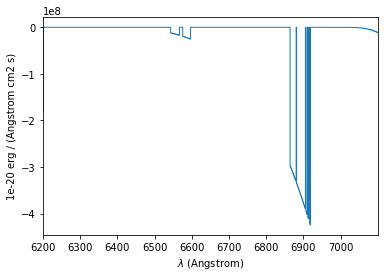

In [21]:
cubeA.mean(axis=(1, 2)).plot()

Looks bad.  Try setting the y limits to something more sensible:

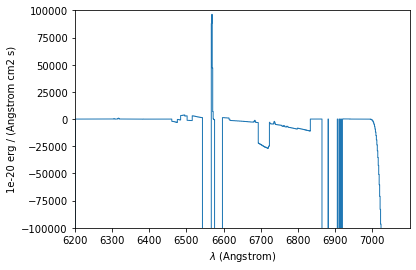

In [22]:
fig, ax = plt.subplots()
cubeA.mean(axis=(1, 2)).plot()
ax.set(
    ylim=[-1e5, 1e5],
);

So that still looks bad - must be some pixels with spurious data.

Look at the summed image:

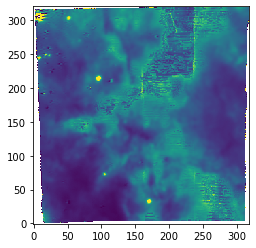

In [23]:
cubeA.sum(axis=0).plot(vmin=-10, vmax=1e6);

So this shows noise in the middle parts that are due to the saturation of Hα, but that is not the problem.  Also has suspicious-looking pixels around the edges. So we will trim these off by expanding the mask by 1 pixel:

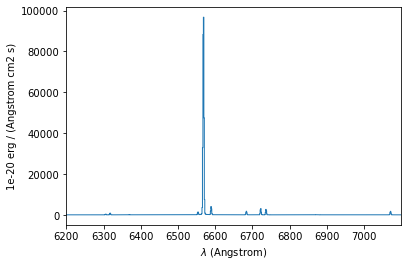

In [24]:
cubeA.spatial_erosion(1).mean(axis=(1, 2)).plot()

That looks a lot better, so we will make the change to the cube

In [25]:
cubeA.spatial_erosion(1, inplace=True)

<Cube(shape=(721, 321, 319), unit='1e-20 erg / (Angstrom cm2 s)', dtype='float64')>

Check the image again

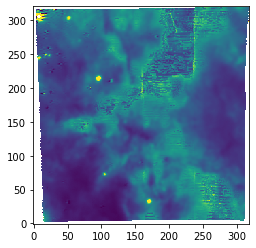

In [26]:
cubeA.sum(axis=0).plot(vmin=-10, vmax=1e6);

Replot the average spectrum, but zoom the y acis so we can see the faint parts:

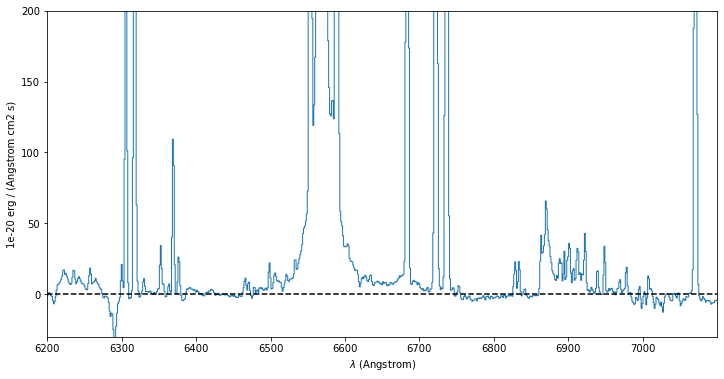

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
cubeA.mean(axis=(1, 2)).plot()
ax.axhline(0.0, linestyle="dashed", color="k")
ax.set(
    ylim=[-30, 200],
);